# Overview of Visualization for Deep Learning
## ComputeFest 
### Winter, 2020
<br><br>
<img src="fig/logos.jpg" style="height:150px;">

In [96]:
# Includes the necessary libraries
import numpy as np
import matplotlib.pylab as plt 
import os

# for implementing neural network models
from keras import backend as K
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback, ModelCheckpoint, History 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.optimizers import SGD, Adam

# for data preprocessing and non-neural network machine learning models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification, make_circles
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import confusion_matrix, roc_auc_score

%matplotlib inline

random_state = 0
random = np.random.RandomState(random_state)

In [94]:
def scatter_plot_data(x, y, ax):
    '''
    scatter_plot_data scatter plots the patient data. A point in the plot is colored 'red' if positive outcome 
    and blue otherwise.
    
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.9, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.9, c='blue', label='class 0')
    ax.set_xlim((min(x[:, 0]) - 0.5, max(x[:, 0]) + 0.5))
    ax.set_ylim((min(x[:, 1]) - 0.5, max(x[:, 1]) + 0.5))
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x, y, model, ax, poly_degree=1):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (negative outcome) or 1 (positive outcome)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
    returns: 
       ax - the axis with the scatter plot
    
    '''
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='blue', label='class 0')
    
    # Create mesh
    x0_min = min(x[:, 0])
    x0_max = max(x[:, 0])
    x1_min = min(x[:, 1])
    x1_max = max(x[:, 1])
    interval = np.arange(min(x0_min, x1_min), max(x0_max, x1_max), 0.1)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_degree > 1):
        polynomial_features = PolynomialFeatures(degree=poly_degree)
        xx = polynomial_features.fit_transform(xx)
        
    yy = model.predict(xx)   
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='bwr')
    ax.contour(x1, x2, yy, colors='black', linewidths=0.2)
    ax.set_xlim((x0_min, x0_max))
    ax.set_ylim((x1_min, x1_max))
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    ax.legend(loc='best')
    return ax

## Outline
1. What is this workshop about?
2. A Motivating Real-world Example
3. Taxonomy of Deep Learning Visualization Literature
4. Hands-on Exercise: Saliency Maps for Model Diagnostic

## What is This Workshop About?

- **What:** those of you coming from data intensive disciplines are fluent in the techniques of data visualization - this is an well-established, deep and interdisciplinary field. Today we focus on visualizations that probe the properties of machine learning models built for data sets. <br><br>

- **Who:** this workshop is intended for folks who have working familiarity with some machine models (neural network based or not). This introductory lecture will give a brief guided tour of the literature. We will define what is a neural networks model and given motivatations for model visualization.

  The following workshop will guide you through implementation of a number of these visualization techniques.<br><br>

- **How:** notes for this lecture are online and are best used as a conceptual foundation for the workshop, as well as a starting point for exploring this body of literature. 

# A Motivating Real-world Example

## Predicting Positive Outcomes for IVF Patients

<img src="fig/ivf.png" style="height:300px;">

## A Simple Model: Logistic Regression 
We build a simple predictive model: **logistic regression**. We model the probability of an patient $\mathbf{x} \in \mathbb{R}^{\text{input}}$ having a positive outcome (encoded by $y=1$) as a function of its distance from a hyperplane parametrized by $\mathbf{w}$ that separates the outcome groups in the input space.
<img src="./fig/fig0.png" style='height:300px;'>

That is, we model $p(y=1 | \mathbf{w}, \mathbf{x}) = \mathrm{sigmoid}(\mathbf{w}^\top \mathbf{x})$. Where $g(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}=0$ is the equation of the decision boundary.

## Visualizing the Top Predictors

We sort the weights of the logistic regression model

$$p(y=1 | \mathbf{w}, \mathbf{x}) = \mathrm{sigmoid}(\mathbf{w}^\top \mathbf{x})$$

and visualize the weights and the corresponding data attribute. Why is this a good idea?

<img src="./fig/features.png" style='height:500px;'>

## Interpreting the Top Predictors

We visualize the distribution of the predictor `E2_max` for both postive and negative outcome groups. What can we conclude about this predictor?
<img src="./fig/feature_1.png" style='height:300px;'>

## Interpreting the Top Predictors
We visualize the distribution of the predictor `Trigger_Med_nan` for both postive and negative outcome groups. What can we conclude about this predictor?

<img src="./fig/feature_2.png" style='height:300px;'>

## Lessons for Visualization

Choosing/designing machine learning visualization requires that we think about:

1. ***Why and for whom*** **to visualize**: for example
 - are we visualizing to diagnose problems with our models?
 - are we visualizing to interpret our models with clinical meaningfulness?<br><br>

2. ***What and how*** **to visualize**: for example
 - do we visualize decision boundaries, weights of our model, and or distributional differences in the data?
 
  **Note:** what is possible to visualize depends very much on the internal mechanics of our model and the data!

## What If the Decision Boundary is Not Linear?

How would you parametrize a ellipitical decision boundary?

<img src="./fig/fig1.png" style='height:300px;'>

We can say that the decision boundary is given by a ***quadratic function*** of the input:

$$
g(\mathbf{x}) = w_1x^2_1 + w_2x^2_2 + w_3 = 0
$$

We can fit such a decision boundary using logistic regression with degree 2 polynomial features.

## How would you parametrize an arbitrary complex decision boundary?

<img src="./fig/fig2.png" style='height:300px;'>

It's not easy to think of a function $g(\mathbf{x})$ can capture this decision boundary. Also, assuming an exact form for $g$ is restrictive. 

**GOAL:** Build increasingly good approximations, $\widehat{g}$, of the "true deicision boundary" $g$ by composing simple functions. This $\widehat{g}$ is essentially a **neural network**.

## What is a Neural Network?

**Goal:** build a complex function $\widehat{g}$ by composing simple functions.

For example, let the following picture represents the approximation $\widehat{g}(\mathbf{x}) = f\left(\sum_{i}w_ix_i\right)$, where $f$ is a non-linear transform:

<img src="./fig/fig4.png" style='height:200px;'>


## Neural Networks as Function Approximators

Then we can define the function $\widehat{g}$ with a graphical schema representing a complex series of compositions and sums of the form, $f\left(\sum_{i}w_ix_i\right)$

<img src="./fig/fig5.png" style='height:300px;'>

This is a ***neural network***. We denote the weights of the neural network collectively by $\mathbf{W}$.
The non-linear function $f$ is called the ***activation function***. Nodes in this diagram that are not representing input or output are called ***hidden nodes***. This diagram, along with the choice of activation function $f$, that defines $\widehat{g}$ is called the ***architecture***.

## Training Neural Networks

We ***train*** a neural network classifier, 

$$p(y=1 | \mathbf{w}, \mathbf{x}) = \mathrm{sigmoid}\left(\widehat{g}_{\mathbf{W}}(\mathbf{x})\right)$$

by finding weights $\mathbf{W}$ that parametrizes the function $\widehat{g}_{\mathbf{W}}$ that "best fits the data" - e.g. best separate the classes. 

Typically, we optimize the fit of $\widehat{g}_{\mathbf{W}}$ to the data **incrementally** and **greedily** in a process called ***gradient descent***.


## What to Visualize for Neural Network Models?
For logistic regression, $p(y=1 | \mathbf{w}, \mathbf{x}) = \mathrm{sigmoid}(\mathbf{w}^\top \mathbf{x})$, we were able to interrogate the model by printing out the weights of the model. 

For a neural network classifier, $p(y=1 | \mathbf{w}, \mathbf{x}) = \mathrm{sigmoid}\left(\widehat{g}_{\mathbf{W}}(\mathbf{x})\right)$, would it be helpful to print out all the weights?

<img src="./fig/fig5.png" style='height:300px;'>

## Weight Space Versus Function Space

While it's convienient to build up a complex function by composing simple ones, understanding the impact of each weight on the outcome is now much more difficult. 

In fact, the relationship between the space of weights of a neural network and the function the network represents is extremely complicated:
1. the same function may be represented by two very different set of weights for the same architecture<br><br>
2. the architecture may be overly expressive - it can express the function $\widehat{g}$ using a subset of the weights and hidden nodes (i.e. the trained model can have weights that are zero or nodes that contribute little to the computation).

**Question:** are there more global/heuristic properties of these models that we can visualize?

## A Non-linear Classification Problem

#### Make a toy data set that cannot be classified by a linear decision boundary. 

We make use of the `.make_*()` functions provided by the `sklearn` libary, specifying the noise level (how much the two classes overlap) and the number of samples in our data set. By default, the classes generated will be balanced (i.e. there will be roughly an equal number of instances in both classes).

In [57]:
# generate a toy classification data set with non-linear decision boundary
X, Y = make_moons(noise=0.1, random_state=random_state, n_samples=1000)
# we scale the data so that the magnitude along each input dimension are roughly equal
X = scale(X)
# split the data set into testing and training, with 30% for test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

#### Fit a logistic regression model with a linear decision boundary
We fit an instance of `sklearn`'s `LogisticRegression` model to our data. Recall that 'fitting' the model means finding the coefficients, $\mathbf{w}$, of the linear decision boundary that best fit the data. Here the criteria of fitness will be the likelihood of the training data given the model $\mathbf{w}$. `LogisticRegression` requires that you choose a method for maximizing the likelihood over $\mathbf{w}$ (e.g. `lbfgs`). 

In [58]:
# instantiate a sklearn logistic regression model 
logistic = LogisticRegression(solver='lbfgs')
# fit the model to the training data
logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluating the fitted model

To evaluate the mode that we've fitted to the data, we can compute a number of metrics like accuracy (or a confusion matrix, balanced accuracy, F1 etc if the classes are unbalanced). These metrics tell us how well our model does but not why it is able to achieve such performance. When possible, it is still preferable to visualize the data along with the classifier's decision boundary (or surface in higher dimensions) - this gives a nuanced picture that explains the models performance on various metrics.

In [59]:
# evaluate the accuracy of our classifier on the training and testing data
print('Training accuracy of linear logistic regression:', logistic.score(X_train, Y_train))
print('Testing accuracy of linear logistic regression:', logistic.score(X_test, Y_test))

Training accuracy of linear logistic regression: 0.8785714285714286
Testing accuracy of linear logistic regression: 0.8666666666666667


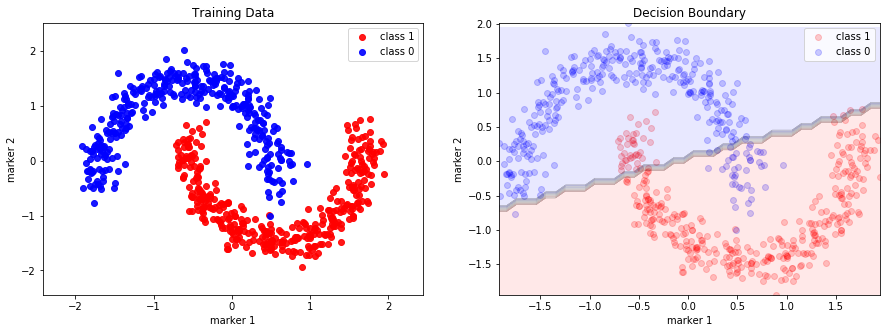

In [60]:
degree_of_polynomial = 1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
scatter_plot_data(X_train, Y_train, ax[0])
ax[0].set_title('Training Data')

plot_decision_boundary(X_train, Y_train, logistic, ax[1], degree_of_polynomial)
ax[1].set_title('Decision Boundary')
plt.show()

## A Neural Network Model for Classification
We train a neural network classifier (with relu activation): $p(y=1 | \mathbf{w}, \mathbf{x}) = \mathrm{sigmoid}\left(\widehat{g}_{\mathbf{W}}(\mathbf{x})\right)$


<img src="fig/architecture.jpeg" style="height:350px;">


*Generated with: [`http://alexlenail.me/NN-SVG/index.html`](http://alexlenail.me/NN-SVG/index.html)*

#### Implement the neural network classifier in `keras`

The `python` library `keras` provides convenient and intuitive api for quickly building up deep learning models. Essentially, if you have a graphical representation of the neural network architecture you can translate this graph, layer by layer, into `keras` objects.

In [85]:
def create_model(input_dim, optimizer):
     '''
    create_model creates a neural network model for classification in keras.
    input:
       input_dim - the number of data attributes
       optimizer - the method of optimization for training the neural network
    returns: 
       model - the keras neural network model  
    '''
    # create sequential multi-layer perceptron in keras
    model = Sequential()
    #layer 0 to 1: input to 100 hidden nodes 
    model.add(Dense(100, input_dim=input_dim, activation='relu', 
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros')) 
    #layer 1 to 2: 100 hidden nodes to 2 hidden nodes
    model.add(Dense(2, activation='relu', 
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros'))
    #binary classification, one output: 2 hidden nodes to one output node
    #since we're doing classification, we apply the sigmoid activation to the 
    #linear combination of the input coming from the previous hidden layer
    model.add(Dense(1, activation='sigmoid', 
                    kernel_initializer='random_uniform',
                    bias_initializer='zeros')) 

    # configure the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

#### Fit a neural network classifier
We fit the neural network model to our data. Recall that 'fitting' the model means finding the network weights, $\mathbf{W}$, parametrizing a non-linear decision boundary that best fit the data. Again, the criteria of fitness here will be the likelihood of the training data given the model $\mathbf{w}$. `keras` requires that you choose a method for iteratively maximizing the likelihood over $\mathbf{w}$ - there are many flavors of gradient descent (e.g. `sgd`, `adam`), these different methods may learn very different models. 

In [86]:
input_dim = X_train.shape[1]
model = create_model(input_dim, 'sgd')
# fit the model to the data and save value of the objective function at each step of training
history = model.fit(X_train, Y_train, batch_size=20, shuffle=True, epochs=500, verbose=0)

#### Diagnosing potential problems during training

A way to diagnose potential basic issues during training is visualizing the objective function (model fitness) during gradient descent. Since we typically frame maximizing model fitness as minimizing a ***loss function***, we expect to see the loss to go down over iterations of gradient descent.

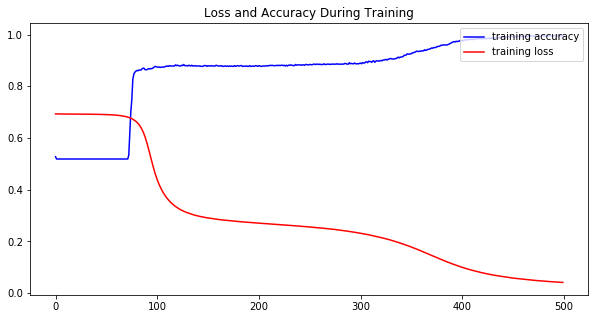

In [87]:
# plot the loss function and the evaluation metric over the course of training
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.array(history.history['accuracy']), color='blue', label='training accuracy')
ax.plot(np.array(history.history['loss']), color='red', label='training loss')
ax.set_title('Loss and Accuracy During Training')
ax.legend(loc='upper right')
plt.show()

## How Well Does Our Neural Network Classifier Do?

In [88]:
# Evaluate the training and testing performance of your model 
# Note: you should check both the loss function and your evaluation metric
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train accuracy:', score[1], '\n\n')

Train accuracy: 0.9971428513526917 




So the neural network classifier is much much more accurate than the logistic regression model with a linear decision boundary. But how exactly is it able to achieve this performance. Again, we want a much more nuanced understanding of the model performance than that which is given by numeric summary metrics.

## Why is a Neural Network Classifier So Effective?

Visualizing the decision boundary:

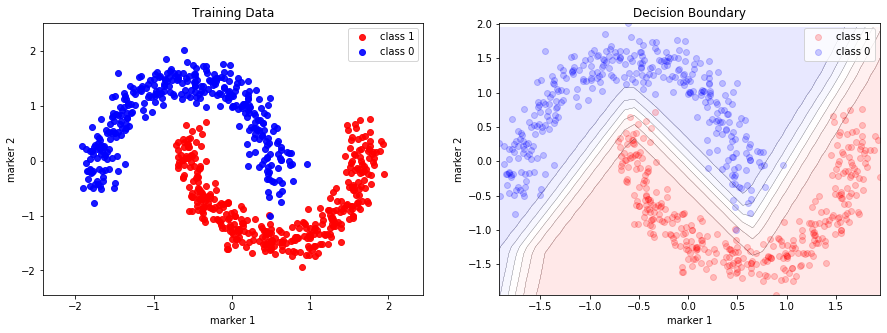

In [95]:
degree_of_polynomial = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
scatter_plot_data(X_train, Y_train, ax[0])
ax[0].set_title('Training Data')

plot_decision_boundary(X_train, Y_train, model, ax[1], degree_of_polynomial)
ax[1].set_title('Decision Boundary')
plt.show()

## Why is a Neural Network Classifier So Effective?

Visualizing the output of the last hidden layer.

Before neural network models became wildly popular in machine learning, a common method for building non-linear classifiers is to first map the data, in the input space $\mathbb{R}^{\text{input}}$, into a 'feature' space $\mathbb{R}^{\text{feature}}$, such that the classes are well-separated in the feature space. Then, a linear classifier can be fitted to the transformed data.

If we ignore the output node of our neural network classifier, we are left with a function, $\mathbb{R}^{2} \to \mathbb{R}^2$, mapping the data from the input space to a 2-dimensional feature space. The transformed data (and in general, the output from a hidden layer in a neural network) is called a ***representation*** of the data. 

<img src="fig/architecture.jpeg" style="height:350px;">

Visualizing these representations can often shed light on how and what neural network models learns from the data.

In [90]:
# get the class probabilities predicted by our MLP on the training set
Y_train_pred = model.predict(X_train)
Y_train_pred = Y_train_pred.reshape((Y_train_pred.shape[0], ))
# get the activations for the last hidden layer in the network
last_hidden_layer = -2
latent_representation = K.function([model.input, K.learning_phase()], [model.layers[last_hidden_layer].output])
activations = latent_representation([X_train, 1.])[0]

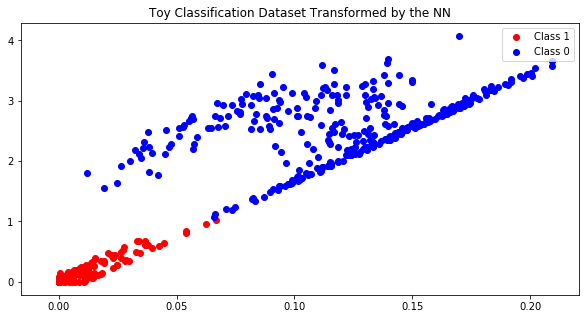

In [97]:
# plot the latent representation of our training data at the first hidden layer
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(activations[Y_train_pred >= 0.5, 0], activations[Y_train_pred >= 0.5, 1], color='red', label='Class 1')
ax.scatter(activations[Y_train_pred < 0.5, 0], activations[Y_train_pred < 0.5, 1], color='blue', label='Class 0')
ax.set_title('Toy Classification Dataset Transformed by the NN')
ax.legend()
plt.show()

## Two Interpretations of a Neural Network Classifier: 
<table>
    <tr><td><font size="3">A Complex Decision Boundary $g\quad\quad\quad\quad\quad$</font></td>
        <td><font size="3">A Transformation $g_0$ and a linear model $g_1\quad\quad\quad\quad$</font></td>
    <tr><td><img src="fig/decision.png" style="height:350px;"></td>
        <td><img src="fig/architecture2.png" style="height:400px;"></td></tr>
</table>

## Is the Model Right for the Right Reasons?

Now that we see that the boosted performance of neural network models come from the fact that they can express complex functions (either capturing decision boundaries or transformations of the data).

Do these visualization help us answer the same questions we asked of the logistic regression model?

- which attributes are most predictive of a positive outcome?<br><br>
- is the relationship between these attributes and the outcome clinically meaningful?

## Lessons for Visualization
Choosing/designing machine learning visualization requires that we think about:

1. ***Why and for whom*** **to visualize**: for example
 - are we visualizing to diagnose problems with our models?
 - are we visualizing to interpret our models with clinical meaningfulness?<br><br>

2. ***What and how*** **to visualize**: for example
 - do we visualize decision boundaries, weights of our model, and or distributional differences in the data?
 
  **Note:** what is possible to visualize depends very much on the internal mechanics of our model and the data!<br><br>
  
3. **Deep models present unique challenges for visualization**: we can answer the same questions about the model, but our method of interrogation must change!

# Taxonomy of Deep Learning Visualization Literature

## Why and for Whom

1. **Interpretability & Explainability:** understand how deep learning models make decisions and what representations they have learned.<br><br>
2. **Debugging & Improving Models:** help model developers build and debug their models, with the hope of expediting the iterative experimentation process to ultimately improve performance.<br><br>
3. **Teaching Deep Learning Concepts:** educate non-expert users about AI.

*From: [Visual Analytics in Deep Learning: An Interrogative Survey for the Next Frontiers](https://arxiv.org/pdf/1801.06889.pdf)*

## TensorBoard

TensorBoard provides a wide array of visualization tools for model diagnostics.

<img src="./fig/tensorboard.png" style='height:500px;'>

*From: [Tensorboard](https://www.tensorflow.org/tensorboard)*

## Explaining Classifier Decisions in Medical Imaging

Visualization of the evidence for the correct classification of an MRI as positive of presence of disease.

<img src="./fig/medical.png" style='height:450px;'>

*From: [Visualizing Deep Neural Network Decisions: Prediction Difference Analysis](https://arxiv.org/pdf/1702.04595.pdf)*

## How and What

**What technical components of neural networks could be visualized?**
- Computational Graph & Network Architecture
- Learned Model Parameters: weights, filters
- Individual Computational Units: activations, gradients
- Aggregate information: performance metrics

**How can they be insightfully visualized?**

How depends on the type of data and model as well as our specific investigative goal.

# All Data Types

## Activations and Weights
By visualizing the network weights and activations (the output of hidden nodes) as we train, we can diagnose issues that ultimately impact model performance. 

The following visualizes the distribution of activations in two hidden layers over the course of training. What problems do we see?

<img src="./fig/tensor_board.png" style='height:350px;'>

*From: [Tensorboard](https://www.tensorflow.org/tensorboard)*

## Visualizing Top Predictors by Input Gradient 
Since the input gradient of an objective function for a trained model indicates which input dimensions has the greatest effect on the model decision at an input $\mathbf{x}$, we can visualize the "top predictors" of outcome for a particular input $\mathbf{x}$.

We can think of this as approximating our neural network model with a linear model locally at an input $\mathbf{x}$ and then interpreting the weights of this linear approximation.

<img src="./fig/features.png" style='height:300px;'>

*From: [How to Explain Individual Classification Decisions](http://www.jmlr.org/papers/volume11/baehrens10a/baehrens10a.pdf)*

# Image Data

## Saliency Maps

When each input dimension is a pixel, we can visualize the input gradients for a particular image as a heat-map, called ***saliency map***. Higher gradient regions representing portions of the image that is most impactful for the model's decision.

<img src="./fig/saliency.png" style='height:450px;'>

*From: [Top-down Visual Saliency Guided by Captions](https://www.groundai.com/project/top-down-visual-saliency-guided-by-captions/2)*

## Class Maximization
We can also visualize the image exemplar of a class, according to a trained model. That is, we find image $\mathbf{x}^*$ that maximizes the "chances" of classifying that image as class $c$: 
$
\mathbf{x}^* = \mathrm{argmax}_\mathbf{x}\; \mathrm{score}_c(\mathbf{x})
$

<img src="./fig/class_max.png" style='height:450px;'>

*From: [Deep Inside Convolutional Networks](https://arxiv.org/pdf/1312.6034.pdf), [Multifaceted Feature Visualization](https://arxiv.org/pdf/1602.03616.pdf)*

## Working with Image Data is Challenging

In applications involving images, the first task is often to parse an image into a set of 'features' that are relevant for the task at hand. That is, we prefer not to work with images as a set of pixels.

<img src="./fig/fig8.jpg" style='height:300px;'>

Formally, we want to learn a function $h$ mapping an image $X$ to a set of $K$ ***features*** $[F_1, F_2, \ldots, F_K]$, where each $F_k$ is an image represented as an array. We want to learn a neural network, called a **convolutional neural network**, to represent such a function $h$.

## Convolutional Layers
A ***convolutional neural network*** typically consists of feature extracting layers and condensing layers.

The feature extracting layers are called ***convolutional layers***, each node in these layers uses a small fixed set of weights to transform the image in the following way:
<img src="./fig/fig9.gif" style="width: 500px;" align="center"/>
This set of fixed weights for each node in the convolutional layer is often called a ***filter***.

## Connections to Classical Image Processing
The term "filter" comes from image processing where one has standard ways to transforms raw images:

<img src="./fig/fig10.png" style="width: 400px;" align="center"/>

## What Do Filters Do?
For example, to blur an image, we can pass an $n\times n$ filter over the image, replacing each pixel with the average value of its neighbours in the $n\times n$ window. The larger the window, the more intense the blurring effect. This corresponds to the Box Blur filter, e.g. $\frac{1}{9}\left(\begin{array}{ccc}1 & 1 & 1\\ 1 & 1 & 1 \\1 & 1 & 1\end{array}\right)$:

<img src="./fig/fig11.png" style="width: 600px;" align="center"/>

In an Gaussian blur, for each pixel, closer neighbors have a stronger effect on the value of the pixel (i.e. we take a weighted average of neighboring pixel values).


## Convolutional Networks for Image Classification in `keras`

#### Defining image size, filter size etc:

``` python
# image shape
image_shape = (64, 64)
# Stride size
stride_size = (2, 2)
# Pool size
pool_size = (2, 2)
# Number of filters
filters = 2
# Kernel size
kernel_size = (5, 5)
```

#### The model:

``` python 
cnn_model = Sequential()
# feature extraction layer 0: convolution
cnn_model.add(Conv2D(filters, kernel_size=kernel_size, padding='same',
                     activation='tanh',
                     input_shape=(image_shape[0], image_shape[1], 1)))
# feature extraction layer 1: max pooling
cnn_model.add(MaxPooling2D(pool_size=pool_size, strides=stride_size))

# input to classification layers: flattening
cnn_model.add(Flatten())

# classification layer 0: dense non-linear transformation
cnn_model.add(Dense(10, activation='tanh'))
# classification layer 3: output label probability
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile model 
cnn_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

## Feature Extraction for Classification

Rather than processing image data with a pre-determined set of filters, we want to learn the filters of a CNN for feature extraction. Our goal is to extract features that best helps us to perform our downstream task (e.g. classification).

**Idea:** We train a CNN for feature extraction and a model (e.g. MLP, decision tree, logistic regression) for classification, *simultaneously* and *end-to-end*.

<img src="./fig/fig13.png" style="width: 800px;" align="center"/>

## What to Visualize for CNNs?
The first things to try are: 
1. visualize the result of applying a learned filter to an image 
2. visualize the filters themselves:

<table>
    <tr><td><img src="fig/bird.png" style="height:250px;"></td>
        <td><img src="fig/bird_features.png" style="height:250px;"></td>
        <td><img src="fig/bird_filters.png" style="height:250px;"></td></tr>
</table>

Unfortunately, these simple visualizations don't shed much light on what the model has learned.

## Activation Maximization: Generating Exemplars
Rather than visualizing a particular filter or the representation of a particular image at a hidden layer, we can visualize the image that maximize the output and hence impact of that filter or layer. Such an image is an exemplar of the filter or feature that the model has learned.

That is, we find image $\mathbf{x}^*$ that maximizes activation of a filter or a hidden layer (representation) while holding the network weights fixed: 

$$
\mathbf{x}^* = \mathrm{argmax}_\mathbf{x}\; \mathrm{activation}_{\text{$f$ or $l$}}(\mathbf{x}).
$$

<img src="./fig/activation_max.png" style="width:1000px;" align="center"/>

## Visualizing Convolutional Features By Activation Maximization


<img src="./fig/feature_viz.png" style="width:1000px;" align="center"/>

*From: [Feature Visualization](https://distill.pub/2017/feature-visualization/)*

## Visualizing Convolutional Filters By Activation Maximization

<table>
    <tr><td><img src="fig/filters.jpg" style="height:350px;"></td>
        <td><img src="fig/filters2.jpg" style="height:350px;"></td>
        <td><img src="fig/filters3.jpg" style="height:350px;"></td>
    </tr>
</table>

*From: [DeepViz](https://github.com/yosinski/deep-visualization-toolbox)*

## Interpretation with a Grain of Salt

 - Some widely deployed saliency methods are independent of both the data the model was trained on, and the model parameters! 

 - A transformation with no effect on the model can cause numerous saliency methods to incorrectly attribute!

  <img src="fig/saliency_problems.png" style="height:350px;">

  *From: [Sanity Checks for Saliency Maps](https://papers.nips.cc/paper/8160-sanity-checks-for-saliency-maps.pdf), [THE (UN)RELIABILITY OF SALIENCY METHODS](https://arxiv.org/pdf/1711.00867.pdf)*

## Example: Saliency Maps for Model Diagnostic

Here is a guided example of using saliency maps to diagnose problems with a neural work classifier (this has not yet been converted to `keras`!).

https://tinyurl.com/w5h54vg

# Text Data

## Representing Textual Data
Comparing the content of the following two sentences is easy for an English speaking human (clearly both are discussing the same topic, but with different emotional undertone):

1. Linear R3gr3ssion is very very cool!
2. What don’t I like it a single bit? Linear regressing!

But a computer doesn’t understand
  - which words are nouns, verbs etc (grammar)
  - how to find the topic (word ordering)
  - feeling expressed in each sentence (sentiment)
We need to represent the sentences in formats that a computer can easily process and manipulate.

## Preprocessing

If we’re interested in the topics/content of text, we may find many components of English sentences to be uninformative.

1. Word ordering
2. Punctuation
3. Conjugation of verbs (go vs going), declension of nouns (chair vs chairs)
4. Capitalization
5. Words with mostly grammatical functions: prepositions (before, under), articles (the, a, an) etc
6. Pronouns?

These uninformative features of text will only confuse and distract a machine and should be removed.

## Representing Documents: Bag Of Words

After preprocessing our sentences:

1. (**S1**) linear regression is very very cool
2. (**S2**) what don’t like single bit linear regression

We represent text in the format that is most accessible to a computer: numeric. 

We simply make a vector of the counts of the words in each sentence.

<img src="./fig/fig15.png" style='height:100px;'>


Turning a piece of text into a vector of word counts is called ***Bag of Words***.

## Solving Machine Learning Tasks Using Bag of Words

We can apply any existing machine learning model for classification or regression to the numerical representations of text data! In particular, we can apply a neural network classifier to BoW representations of text to perform document classification.

<img src="./fig/fig16.png" style='height:300px;'>

## What Do the Hidden Layers in the Network Mean?
The hidden layers of the document classifying are representations of words are **low-dimensional** real-valued vectors. These vectors are called ***word embeddings***. Sometimes, these representation captures semantic information and are much more compressed than the BoW representations!

Such embeddings are often extracted and used in future tasks in the place of BoW representations.

<img src="./fig/fig17.png" style='height:400px;'>

Commonly used word embeddings:
1. **Word2Vec:** embeddings (representations of words extracted from a hidden layers of a neural network model) obtained by training a neural network to predict a target word using context, or to predict a target context using a word.<br><br>

2. **GloVe:** Ratios of word-word co-occurrence probabilities can encode meaning. Learn word vectors (embeddings) such that their dot product equals the logarithm of the words’ probability of co-occurrence (matrix factorization). This associates the log ratios of co-occurrence probabilities with vector differences in the word vector space.

## Visualizing Word Embeddings

There are a number of tools that allows users to interactively visualizes embeddings by rendering them in two or three dimensions.

<img src="./fig/embedding.gif" style='height:400px;'>

*From: [Embedding Projector](http://projector.tensorflow.org)*

## Visualizing Bias
By visualizing word embeddings, we can often discover conceptual biases underlying the way we use language today - machine learning models often pick up these biases and propagate them unknowingly.

For example, word embeddings often capture semantic relationship between words - the vector for 'apple' maybe close in Euclidean distance to the vector for 'pear'. However, given the training data (documents generated by human beings) word embeddings will also learn to associate 'man' with 'engineer' and 'woman' with 'homemaker'.

<img src="./fig/bias.png" style='height:400px;'>

*From: [wordbias](http://wordbias.umiacs.umd.edu)*

## Additional Resources

1. [Visual Analytics in Deep Learning: An Interrogative Survey for the Next Frontiers](https://arxiv.org/pdf/1801.06889.pdf)

2. [Understanding Neural Networks via Feature Visualization: A survey](https://arxiv.org/pdf/1904.08939.pdf)

3. [Visualizing and Understanding Recurrent Networks](http://vision.stanford.edu/pdf/KarpathyICLR2016.pdf)

4. [Visualizing memorization in RNNs](https://distill.pub/2019/memorization-in-rnns/)

5. [distill.pub](https://distill.pub)

6. [Google PAIR](https://research.google/teams/brain/pair/)